In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sheet1 = pd.read_excel('database.xlsx', 'Sheet1')
sheet2 = pd.read_excel('database.xlsx', 'Sheet2')
sheet3 = pd.read_excel('database.xlsx', 'Sheet3')
sheet4 = pd.read_excel('database.xlsx', 'Sheet4')
sheet5 = pd.read_excel('database.xlsx', 'Sheet5')

In [3]:
def dataset_builder(sheet1,sheet2,sheet3,sheet4,sheet5): 
    sheet54 = pd.merge(sheet5, sheet4, on='session_id')
    sheet543 = pd.merge(sheet54 , sheet3, on='course_id')
    sheet543_new = sheet543.rename(columns={'stu_prof_id': 'user_id'})
    sheet1_new = sheet1.rename(columns={'prof_id':'user_id'})
    sheet2_new = sheet2.rename(columns={'stu_id': 'user_id'})
    sheet5432 = pd.merge(sheet543_new, sheet2_new, how='left', on = 'user_id')
    sheet54321 = pd.merge(sheet5432 , sheet1_new, how = 'left', on = 'user_id')
    return sheet54321

In [4]:
df = dataset_builder(sheet1,sheet2,sheet3,sheet4,sheet5)
df
#df[df.course_name == 'CO14']['prof_name'].dropna()

,session_id,user_id,in_time,out_time,date,course_id,beg_time,end_time,course_name,unit,stu_name,major,prof_name,group,faculty
0,55551,27,8,10.25,1400/07/01,3339,8,10.25,CO7,2,NaN,NaN,asghary,ee,engineering
1,55551,260,8.25,10.5,1400/07/01,3339,8,10.25,CO7,2,hosseini,me,NaN,NaN,NaN
2,55551,258,8,10,1400/07/01,3339,8,10.25,CO7,2,molavi,ce,NaN,NaN,NaN
3,55551,259,8,10.25,1400/07/01,3339,8,10.25,CO7,2,ranjbar,ce,NaN,NaN,NaN
4,55551,242,8,10.5,1400/07/01,3339,8,10.25,CO7,2,hashemi,mete,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2877,55786,245,10.25,11.25,1400/08/13,3346,10,11.50,CO14,3,tajer,me,NaN,NaN,NaN
2878,55786,250,10,11.5,1400/08/13,3346,10,11.50,CO14,3,tashakori,mete,NaN,NaN,NaN
2879,55786,230,10.25,11.25,1400/08/13,3346,10,11.50,CO14,3,taghavi,ce,NaN,NaN,NaN
2880,55786,237,10,11.5,1400/08/13,3346,10,11.50,CO14,3,kheyrdoost,ee,NaN,NaN,NaN


In [5]:
# df_opt2.at['NO. presence', course] = len(df[cond_opt2])   #check
# df_opt2.at['NO. absence', course] = len(list(df[df.course_name == course]['session_id'].unique())) - len(df[cond_opt2]) #check


In [6]:
prof = df[df.prof_name.notnull()]
student = df[df.stu_name.notnull()]
student.session_id.value_counts()

55799    18
55762    18
55795    18
55793    18
55791    18
         ..
55611     9
55609     9
55551     9
55622     8
55604     8
Name: session_id, Length: 249, dtype: int64

# Option 1

iat & at

In [12]:
code = int(input('Enter the professor id:\n'))
print('\ncode: ',code)
print('Professor name: ', sheet1.at[int(sheet1[sheet1.prof_id == code].index.values), 'prof_name'])
print('Group: ', sheet1.at[int(sheet1[sheet1.prof_id == code].index.values), 'group'],'\n')


#=== experimental ===
#print('Courses: ', list(df[df.user_id == code]['course_name'].unique()))
prof_course = list(df[df.user_id == code]['course_name'].unique())
df_opt1 = pd.DataFrame(np.zeros((5,len(prof_course))) , 
                       columns = prof_course , 
                       index = ['Number of sessions' , 'Sum of time' , 'Mean of time', 'Max dur', 'Min dur'])

for course in prof_course:
    cond_opt1 = (df.user_id == code) & (df.course_name == course)
    df_opt1.at['Number of sessions', course] = len(df[cond_opt1])  #check
    df_opt1.at['Sum of time', course] = np.sum(df[cond_opt1]['out_time'] - df[cond_opt1]['in_time'])   #check
    df_opt1.at['Mean of time' , course] = np.mean(df[cond_opt1]['out_time'] - df[cond_opt1]['in_time'])  #check
    df_opt1.at['Max dur' , course] = np.max(df[cond_opt1]['out_time'] - df[cond_opt1]['in_time'])   #check
    df_opt1.at['Min dur' , course] = np.min(df[cond_opt1]['out_time'] - df[cond_opt1]['in_time'])   #check    
df_opt1

Enter the professor id:
13

code:  13
Professor name:  razavi
Group:  ie 



,CO8,CO14
Number of sessions,1.00,21.000000
Sum of time,1.75,39.500000
Mean of time,1.75,1.880952
Max dur,1.75,2.250000
Min dur,1.75,1.500000


In [8]:
# b=np.sum(df[(df.course_name == 'CO14') & (df.prof_name == 'razavi')]['out_time'])
# a=np.sum(df[(df.course_name == 'CO14') & (df.prof_name == 'razavi')]['in_time'])
# b-a
# cond_opt1 = (df.user_id == 13) & (df.course_name == 'CO8')
# df[cond_opt1]['out_time'] - df[cond_opt1]['in_time']

# Option 2

In [9]:
code = int(input('Enter the student id:\n'))
print('\ncode: ',code)
print('Student name: ', sheet2.at[int(sheet2[sheet2.stu_id == code].index.values), 'stu_name'])
print('Major: ', sheet2.at[int(sheet2[sheet2.stu_id == code].index.values), 'major'],'\n')


#=== experimental ===
#print('Courses: ', list(df[df.user_id == code]['course_name'].unique()))
stu_course = list(df[df.user_id == code]['course_name'].unique())
df_opt2 = pd.DataFrame(np.zeros((5,len(stu_course))) , 
                       columns = stu_course , 
                       index = ['NO. presence' , 'NO. absence' , 'Sum(after begin)', 'Sum(before end)', 'point'])

#type(df.at[2,'beg_time'])
for course in stu_course:
    cond1_opt2 = (df.user_id == code) & (df.course_name == course)
    cond2_opt2 = (df.in_time != '-') & (df.out_time != '-')
    cond_opt2 = (cond1_opt2) & (cond2_opt2)
    df_opt2.at['NO. presence', course] = len(df[cond_opt2])   #check
    df_opt2.at['NO. absence', course] = len(list(df[cond1_opt2]['session_id'].unique())) - len(df[cond_opt2]) #check

    df_opt2.at['Sum(after begin)' , course] = np.sum(df[cond_opt2]['in_time']) - np.sum(df[cond_opt2]['beg_time'])  #check
    df_opt2.at['Sum(before end)' , course] = np.sum(df[cond_opt2]['end_time']) - np.sum(df[cond_opt2]['out_time'])   #check
    number_presence = df_opt2.at['NO. presence', course]
    after_begin = df_opt2.at['Sum(after begin)' , course]
    before_end = df_opt2.at['Sum(before end)' , course]
    df_opt2.at['point' , course] = (90 * number_presence) - before_end - after_begin   #check    
df_opt2

Enter the student id:
244

code:  244
Student name:  habibollahian
Major:  ce 



,CO7,CO13,CO17,CO3,CO12,CO9,CO1
NO. presence,2.00,12.00,13.00,1.00,0.0,6.00,1.0
NO. absence,0.00,-1.00,2.00,0.00,1.0,3.00,0.0
Sum(after begin),0.25,-0.25,0.50,0.25,0.0,0.75,0.0
Sum(before end),-0.25,-0.25,-0.25,0.25,0.0,0.50,0.0
point,180.00,1080.50,1169.75,89.50,0.0,538.75,90.0


# Option 3

In [10]:
code = int(input('Enter the course id:\n'))
print('\nCode: ',code)
course_name = sheet3.at[int(sheet3[sheet3.course_id == code].index.values), 'course_name'] 
print('Course name: ', course_name)

df_opt3 = pd.DataFrame(np.zeros((7,1)), 
                       columns = [course_name], 
                       index = ['Number of sessions' , 'Average number of students per session' ,
                                'Average number of absent students per session', 'Max of present students',
                                'Max of absent students', 'Total time duration', 'Average time duration per session'])


cond1_opt3 = (df.course_name == course_name)
cond2_opt3 = cond1_opt3 & (df.stu_name.notnull()) & (df.in_time != '-') & (df.out_time != '-')
cond3_opt3 = cond1_opt3 & (df.stu_name.notnull()) & (df.in_time == '-') & (df.out_time == '-') 

df_opt3.at['Number of sessions', course_name] = len(list(df[cond1_opt3]['session_id'].unique()))
df_opt3.at['Average number of students per session', course_name] = (np.sum(df[cond2_opt3]['session_id'].value_counts()))/df_opt3.at['Number of sessions', course_name]
df_opt3.at['Average number of absent students per session', course_name] = (np.sum(df[cond3_opt3]['session_id'].value_counts()))/df_opt3.at['Number of sessions', course_name]
df_opt3.at['Max of present students', course_name] = np.max(df[cond2_opt3]['session_id'].value_counts())
df_opt3.at['Max of absent students', course_name] = np.max(df[cond3_opt3]['session_id'].value_counts())

session = list(df[cond2_opt3]['session_id'].unique())    
for s in session:
    beg_time = float(df[cond2_opt3 & (df.session_id == s)]['beg_time'].unique())
    print(beg_time)
    end_time = float(df[cond2_opt3 & (df.session_id == s)]['end_time'].unique())
    print(end_time)
    df_opt3.at['Total time duration', course_name] += (end_time - beg_time)
    
df_opt3.at['Average time duration per session', course_name] =  df_opt3.at['Total time duration', course_name] / len(session)  

df_opt3    

Enter the course id:
3334

Code:  3334
Course name:  CO2
14.0
15.5
14.0
16.25
10.0
12.0
16.0
17.75
16.0
17.5
12.0
13.75
14.0
15.5
16.0
17.75
10.0
12.25
8.0
10.0
16.0
17.75
8.0
10.25


,CO2
Number of sessions,12.000000
Average number of students per session,7.666667
Average number of absent students per session,2.083333
Max of present students,11.000000
Max of absent students,7.000000
Total time duration,22.250000
Average time duration per session,1.854167


# Option 4

Enter the course id:
3343

Code:  3343
Course name:  CO11


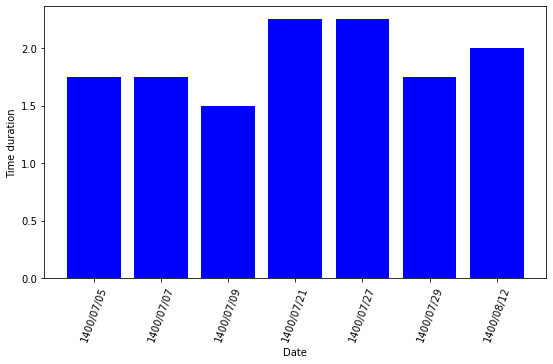

In [11]:
code = int(input('Enter the course id:\n'))
print('\nCode: ',code)
course_name = sheet3.at[int(sheet3[sheet3.course_id == code].index.values), 'course_name'] 
print('Course name: ', course_name)

cond1_opt4 = (df.course_name == course_name)
session = list(df[cond1_opt4]['session_id'].unique())
length_opt4 = len(session)
df_opt4 = pd.DataFrame(np.zeros((length_opt4,2)), 
                       columns = ['Date', 'Time_duration'],
                       index = list(df[cond1_opt4]['session_id'].unique()))

#df[cond1_opt4 & (df.session_id == 55628)]['date'].unique()[0]
df_opt4['Date'] = df_opt4.Date.astype(dtype = str)
for s in session:
    df_opt4.at[s, 'Date'] = df[cond1_opt4 & (df.session_id == s)]['date'].unique()[0]
    beg_time = float(df[cond1_opt4 & (df.session_id == s)]['beg_time'].unique())
    end_time = float(df[cond1_opt4 & (df.session_id == s)]['end_time'].unique())
    df_opt4.at[s, 'Time_duration'] = end_time - beg_time

#df_opt4

#bar_plot:
session_dates = list(df_opt4.Date)
session_time_duration = list(df_opt4.Time_duration)
plt.figure(figsize=(9, 5))
plt.bar(session_dates, session_time_duration, color= 'b' )
plt.xticks(rotation=70)
plt.ylabel('Time duration')
plt.xlabel('Date')
plt.show()

# Option 5

Enter the professor id:
13

code:  13
Professor name:  razavi


<ipython-input-27-dc929760c4fb>:30: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)


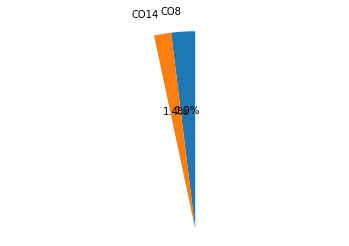

In [27]:
code = int(input('Enter the professor id:\n'))
print('\ncode: ',code)
professor_name = sheet1.at[int(sheet1[sheet1.prof_id == code].index.values), 'prof_name']
print('Professor name: ', professor_name)

prof_course = list(df[df.user_id == code]['course_name'].unique())
df_opt5 = pd.DataFrame(np.zeros((4,len(prof_course))) , 
                       columns = prof_course , 
                       index = ['Number of sessions' , 'Sum of time' , 'Unit', 'Pie_Chart_input'])

for course in prof_course:
    cond_opt5 = (df.user_id == code) & (df.course_name == course)
    df_opt5.at['Number of sessions', course] = len(df[cond_opt5])  #check
    df_opt5.at['Sum of time', course] = np.sum(df[cond_opt5]['out_time'] - df[cond_opt5]['in_time'])   #check
    df_opt5.at['Unit', course] = int(df[cond_opt5]['unit'].unique())
    df_opt5.at['Pie_Chart_input',course] = (df_opt5.at['Sum of time', course])/(45*(df_opt5.at['Number of sessions', course])*(df_opt5.at['Unit', course]))

df_opt5
    
#pie_chart


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = prof_course
values =  list(df_opt5.loc['Pie_Chart_input',:])
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
#ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

ax1.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)    
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



# Option 6

# Option 7

# Option 8

In [4]:
def option(df, click):
    if click == '1':
        pass
    elif click == '2':
        pass
    elif click == '3':
        pass        
    elif click == '4':
        pass
    elif click == '5':
        pass  
    elif click == '6':
        pass        
    elif click == '7':
        pass        
    elif click == '8':
        pass                  
    return None

In [5]:
def Vu(sheet1,sheet2,sheet3,sheet4,sheet5):
    df = dataset_builder(sheet1,sheet2,sheet3,sheet4,sheet5)
    while True:
        print('*** Welcome to Vu report center ***\n')
        click = input('''Press...
(1) to ...
(2) to ...
(3) to ...
(4) to ...
(5) to ...
(6) to ...
(7) to ...
(8) to ...
(E) to exit''')
        cond = ((click=='1') & (click=='2') & (click=='3') & (click=='4') &
                (click=='5') & (click=='6') & (click=='7') &(click=='8'))
        if cond:
            option(df, click)
        elif click == 'E':
            break
        else:
            print('Invalid input')
            continue
    print('*** Good Luck ***')        
    return None  